# End-to-End E-commerce Sales Intelligence System
## Hybrid Business Intelligence & Machine Learning Analysis
Dataset: AdventureWorks (60K+ Transactions)

## Project Overview

This project analyzes the AdventureWorks internet sales dataset to evaluate overall business performance, customer value, and profitability trends. The objective is to generate actionable insights that can support strategic decision-making and revenue growth.

The dataset follows a star schema structure, with a central sales fact table connected to multiple dimension tables including products, customers, dates, and sales territories. This mirrors how enterprise data warehouses are structured in real-world business environments.

The analysis covers data preparation, exploratory data analysis (EDA), profitability assessment, customer lifetime value evaluation, customer segmentation using clustering techniques, and sales forecasting. The goal is to combine business intelligence with machine learning to build a comprehensive sales intelligence solution.

In [36]:
import pandas as pd

In [37]:
file_path = "Data/AdventureWorks.xlsx"

In [38]:
!pip install openpyxl

In [39]:
xls = pd.ExcelFile(file_path)
xls.sheet_names

['FactInternetSales',
 'DimProduct',
 'DimSalesTerritory',
 'DimDate',
 'DimCustomer',
 'DimGeography']

In [40]:
fact = pd.read_excel(file_path, sheet_name="FactInternetSales")
product = pd.read_excel(file_path, sheet_name="DimProduct")
territory = pd.read_excel(file_path, sheet_name="DimSalesTerritory")
date = pd.read_excel(file_path, sheet_name="DimDate")
customer = pd.read_excel(file_path, sheet_name="DimCustomer")
geo = pd.read_excel(file_path, sheet_name="DimGeography")

In [41]:
print("Fact:", fact.shape)
print("Product:", product.shape)
print("Territory:", territory.shape)
print("Date:", date.shape)
print("Customer:", customer.shape)
print("Geography:", geo.shape)

Fact: (60398, 26)
Product: (606, 36)
Territory: (11, 6)
Date: (2191, 19)
Customer: (18484, 29)
Geography: (655, 11)


In [42]:
fact.columns

Index(['ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'CustomerKey', 'PromotionKey', 'CurrencyKey', 'SalesTerritoryKey',
       'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber',
       'OrderQuantity', 'UnitPrice', 'ExtendedAmount', 'UnitPriceDiscountPct',
       'DiscountAmount', 'ProductStandardCost', 'TotalProductCost',
       'SalesAmount', 'TaxAmt', 'Freight', 'CarrierTrackingNumber',
       'CustomerPONumber', 'OrderDate', 'DueDate', 'ShipDate'],
      dtype='object')

In [43]:
fact = fact[[
    "SalesOrderNumber",
    "OrderDateKey",
    "CustomerKey",
    "ProductKey",
    "SalesTerritoryKey",
    "OrderQuantity",
    "SalesAmount",
    "TotalProductCost"
]]

In [44]:
fact.head()
fact.shape

(60398, 8)

In [45]:
product.columns

Index(['ProductKey', 'ProductAlternateKey', 'ProductSubcategoryKey',
       'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
       'SpanishProductName', 'FrenchProductName', 'StandardCost',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'ListPrice', 'Size', 'SizeRange', 'Weight', 'DaysToManufacture',
       'ProductLine', 'DealerPrice', 'Class', 'Style', 'ModelName',
       'LargePhoto', 'EnglishDescription', 'FrenchDescription',
       'ChineseDescription', 'ArabicDescription', 'HebrewDescription',
       'ThaiDescription', 'GermanDescription', 'JapaneseDescription',
       'TurkishDescription', 'StartDate', 'EndDate', 'Status'],
      dtype='object')

In [46]:
product = product[[
    "ProductKey",
    "EnglishProductName",
    "StandardCost",
    "ListPrice",
    "Color",
    "ProductLine",
    "Class",
    "Style"
]]

In [47]:
customer.columns

Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance'],
      dtype='object')

In [48]:
customer = customer[[
    "CustomerKey",
    "GeographyKey",
    "BirthDate",
    "MaritalStatus",
    "Gender",
    "YearlyIncome",
    "TotalChildren",
    "NumberChildrenAtHome",
    "EnglishEducation",
    "EnglishOccupation",
    "HouseOwnerFlag",
    "NumberCarsOwned",
    "DateFirstPurchase",
    "CommuteDistance"
]]

In [49]:
date.columns

Index(['DateKey', 'FullDateAlternateKey', 'DayNumberOfWeek',
       'EnglishDayNameOfWeek', 'SpanishDayNameOfWeek', 'FrenchDayNameOfWeek',
       'DayNumberOfMonth', 'DayNumberOfYear', 'WeekNumberOfYear',
       'EnglishMonthName', 'SpanishMonthName', 'FrenchMonthName',
       'MonthNumberOfYear', 'CalendarQuarter', 'CalendarYear',
       'CalendarSemester', 'FiscalQuarter', 'FiscalYear', 'FiscalSemester'],
      dtype='object')

In [50]:
date = date[[
    "DateKey",
    "FullDateAlternateKey",
    "EnglishDayNameOfWeek",
    "EnglishMonthName",
    "MonthNumberOfYear",
    "CalendarQuarter",
    "CalendarYear"
]]

In [51]:
territory.columns

Index(['SalesTerritoryKey', 'SalesTerritoryAlternateKey',
       'SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
       'SalesTerritoryImage'],
      dtype='object')

In [52]:
territory = territory[[
    "SalesTerritoryKey",
    "SalesTerritoryRegion",
    "SalesTerritoryCountry",
    "SalesTerritoryGroup"
]]

In [53]:
geo.columns

Index(['GeographyKey', 'City', 'StateProvinceCode', 'StateProvinceName',
       'CountryRegionCode', 'EnglishCountryRegionName',
       'SpanishCountryRegionName', 'FrenchCountryRegionName', 'PostalCode',
       'SalesTerritoryKey', 'IpAddressLocator'],
      dtype='object')

In [54]:
geo = geo[[
    "GeographyKey",
    "City",
    "StateProvinceName",
    "EnglishCountryRegionName"
]]

In [55]:
sales = fact.merge(product, on="ProductKey", how="left")

In [56]:
sales = sales.merge(customer, on="CustomerKey", how="left")

In [57]:
sales = sales.merge(territory, on="SalesTerritoryKey", how="left")

In [58]:
sales = sales.merge(geo, on="GeographyKey", how="left")

In [59]:
sales.shape
sales.head()
sales.isnull().sum()

SalesOrderNumber                0
OrderDateKey                    0
CustomerKey                     0
ProductKey                      0
SalesTerritoryKey               0
OrderQuantity                   0
SalesAmount                     0
TotalProductCost                0
EnglishProductName              0
StandardCost                    0
ListPrice                       0
Color                       28919
ProductLine                     0
Class                       38946
Style                       36092
GeographyKey                    0
BirthDate                       0
MaritalStatus                   0
Gender                          0
YearlyIncome                    0
TotalChildren                   0
NumberChildrenAtHome            0
EnglishEducation                0
EnglishOccupation               0
HouseOwnerFlag                  0
NumberCarsOwned                 0
DateFirstPurchase               0
CommuteDistance                 0
SalesTerritoryRegion            0
SalesTerritory

In [60]:
sales["Profit"] = sales["SalesAmount"] - sales["TotalProductCost"]
sales["ProfitMargin"] = sales["Profit"] / sales["SalesAmount"]

In [61]:
sales["Color"] = sales["Color"].fillna("Unknown")
sales["Class"] = sales["Class"].fillna("Unknown")
sales["Style"] = sales["Style"].fillna("Unknown")

In [62]:
sales.shape

(60398, 36)

## Exploratory Data Analysis (EDA)

In [63]:
total_revenue = sales["SalesAmount"].sum()
total_profit = sales["Profit"].sum()
total_orders = sales["SalesOrderNumber"].nunique()
avg_order_value = total_revenue / total_orders

In [64]:
total_revenue, total_profit, total_orders, avg_order_value

(np.float64(29358677.220699996),
 np.float64(12080883.645),
 27659,
 np.float64(1061.4511450413968))

## Key Business Metrics

The dataset contains 27,659 unique internet orders, generating a total revenue of approximately $29.36 million and a total profit of $12.08 million. This results in an average order value of about $1,061 per transaction, indicating relatively high-value purchases.

The overall profit margin is strong, suggesting that the company maintains healthy pricing strategies and cost control across its product offerings.

In [65]:
overall_profit_margin = total_profit / total_revenue
overall_profit_margin

np.float64(0.4114927778994791)

In [67]:
# sales["OrderDate"] = pd.to_datetime(sales["OrderDate"])

In [68]:
sales.columns

Index(['SalesOrderNumber', 'OrderDateKey', 'CustomerKey', 'ProductKey',
       'SalesTerritoryKey', 'OrderQuantity', 'SalesAmount', 'TotalProductCost',
       'EnglishProductName', 'StandardCost', 'ListPrice', 'Color',
       'ProductLine', 'Class', 'Style', 'GeographyKey', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'EnglishEducation', 'EnglishOccupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'DateFirstPurchase',
       'CommuteDistance', 'SalesTerritoryRegion', 'SalesTerritoryCountry',
       'SalesTerritoryGroup', 'City', 'StateProvinceName',
       'EnglishCountryRegionName', 'Profit', 'ProfitMargin'],
      dtype='object')

In [69]:
date.head()
date.columns

Index(['DateKey', 'FullDateAlternateKey', 'EnglishDayNameOfWeek',
       'EnglishMonthName', 'MonthNumberOfYear', 'CalendarQuarter',
       'CalendarYear'],
      dtype='object')

In [70]:
sales = sales.merge(date, left_on="OrderDateKey", right_on="DateKey", how="left")

In [71]:
sales.columns

Index(['SalesOrderNumber', 'OrderDateKey', 'CustomerKey', 'ProductKey',
       'SalesTerritoryKey', 'OrderQuantity', 'SalesAmount', 'TotalProductCost',
       'EnglishProductName', 'StandardCost', 'ListPrice', 'Color',
       'ProductLine', 'Class', 'Style', 'GeographyKey', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'EnglishEducation', 'EnglishOccupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'DateFirstPurchase',
       'CommuteDistance', 'SalesTerritoryRegion', 'SalesTerritoryCountry',
       'SalesTerritoryGroup', 'City', 'StateProvinceName',
       'EnglishCountryRegionName', 'Profit', 'ProfitMargin', 'DateKey',
       'FullDateAlternateKey', 'EnglishDayNameOfWeek', 'EnglishMonthName',
       'MonthNumberOfYear', 'CalendarQuarter', 'CalendarYear'],
      dtype='object')

In [72]:
sales["FullDateAlternateKey"] = pd.to_datetime(sales["FullDateAlternateKey"])

In [73]:
monthly_sales = sales.groupby(
    sales["FullDateAlternateKey"].dt.to_period("M")
)["SalesAmount"].sum().reset_index()

monthly_sales.head()

,FullDateAlternateKey,SalesAmount
0,2005-07,473388.1630
1,2005-08,506191.6912
2,2005-09,473943.0312
3,2005-10,513329.4740
4,2005-11,543993.4058


In [74]:
monthly_sales["FullDateAlternateKey"] = monthly_sales["FullDateAlternateKey"].dt.to_timestamp()

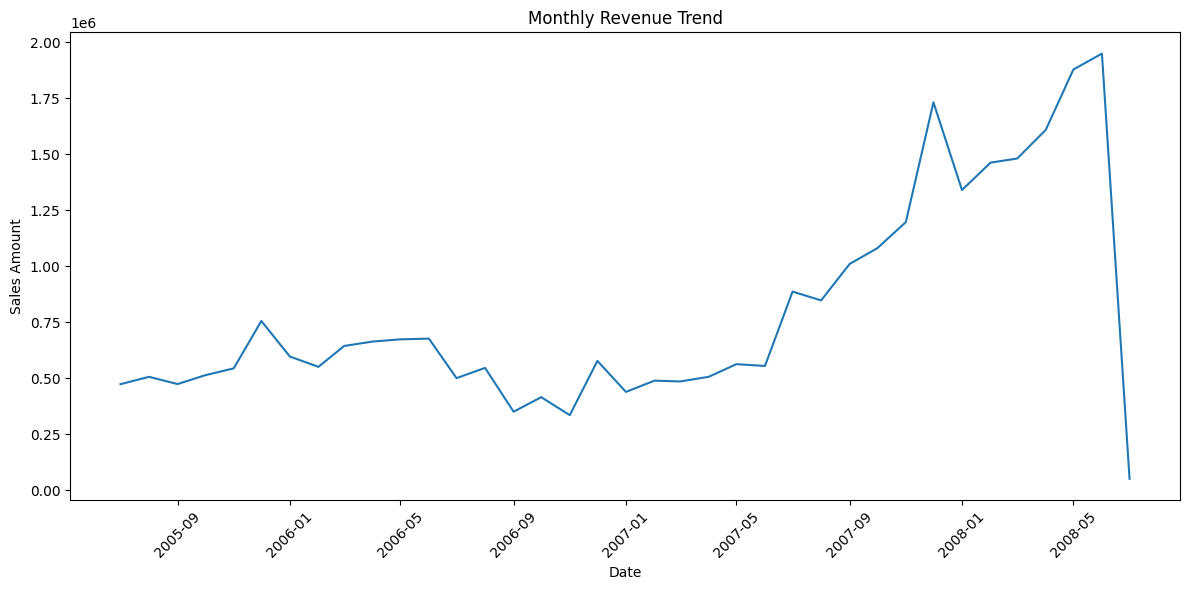

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales["FullDateAlternateKey"], monthly_sales["SalesAmount"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
monthly_sales = monthly_sales.iloc[:-1]

## Revenue Trend Analysis

Monthly revenue shows a consistent upward trend from 2005 to 2008, indicating sustained business growth over the observed period. Growth appears to accelerate significantly during 2007 and 2008, suggesting a possible expansion phase or increased market demand.

The sharp drop observed in the final month is due to incomplete data for that period and does not reflect an actual decline in business performance.

Overall, the revenue trajectory demonstrates strong positive momentum and increasing customer engagement over time.

In [77]:
monthly_avg = sales.groupby("EnglishMonthName")["SalesAmount"].mean().sort_values(ascending=False)

monthly_avg

EnglishMonthName
December     525.215023
June         523.178287
May          513.629003
March        504.174425
April        497.198440
February     494.640613
July         475.556802
January      473.561228
November     457.687303
August       446.336154
October      442.938555
September    433.830256
Name: SalesAmount, dtype: float64

## Seasonality Insights

Analysis of average monthly sales reveals clear seasonal patterns. December records the highest average sales, likely driven by holiday demand and year-end purchasing behavior. Strong performance is also observed in late spring and early summer months such as May and June.

In contrast, late summer and early fall months (August to October) show relatively lower sales performance. This suggests an opportunity for targeted marketing campaigns or promotional strategies to stabilize revenue during slower periods.

The presence of seasonality supports the need for demand forecasting and strategic inventory planning.

In [78]:
region_sales = sales.groupby("SalesTerritoryGroup")["SalesAmount"].sum().sort_values(ascending=False)

region_sales

SalesTerritoryGroup
North America    1.136763e+07
Pacific          9.061001e+06
Europe           8.930042e+06
Name: SalesAmount, dtype: float64

## Regional Performance Analysis

North America represents the highest revenue-generating region, contributing approximately $11.37 million in total sales. This suggests a strong and well-established market presence.

Pacific and Europe follow closely, generating $9.06 million and $8.93 million respectively. The relatively small gap between these regions indicates balanced international performance and potential growth opportunities outside North America.

Strategically, targeted investment and localized marketing efforts in Pacific and European markets could further close the gap and drive global expansion.

In [ ]:
top_products = sales.groupby("EnglishProductName")["SalesAmount"].sum().sort_values(ascending=False).head(10)

top_products

EnglishProductName
Mountain-200 Black, 46     1.373470e+06
Mountain-200 Black, 42     1.363142e+06
Mountain-200 Silver, 38    1.339463e+06
Mountain-200 Silver, 46    1.301100e+06
Mountain-200 Black, 38     1.294866e+06
Mountain-200 Silver, 42    1.257435e+06
Road-150 Red, 48           1.205877e+06
Road-150 Red, 62           1.202299e+06
Road-150 Red, 52           1.080638e+06
Road-150 Red, 56           1.055590e+06
Name: SalesAmount, dtype: float64

## Product Revenue Concentration

Revenue is heavily concentrated in a small number of premium bicycle models, particularly the Mountain-200 and Road-150 series. These products consistently dominate the top revenue rankings.

This suggests a strong premium product strategy, contributing to the company’s high average order value and overall profit margin. However, the concentration of revenue among a limited set of products introduces potential portfolio risk.

Diversifying product performance or strengthening mid-tier product offerings may reduce dependency on a small number of flagship models.

In [79]:
top_profit_products = sales.groupby("EnglishProductName")["Profit"].sum().sort_values(ascending=False).head(10)

top_profit_products

EnglishProductName
Mountain-200 Black, 46     626621.5735
Mountain-200 Black, 42     621759.6083
Mountain-200 Silver, 38    610864.4348
Mountain-200 Silver, 46    593490.4728
Mountain-200 Black, 38     590477.4604
Mountain-200 Silver, 42    573511.9376
Road-150 Red, 48           474150.8446
Road-150 Red, 62           472743.8688
Road-150 Red, 52           424906.6916
Road-150 Red, 56           415057.8610
Name: Profit, dtype: float64

## Profitability Analysis by Product

The products generating the highest revenue also contribute the highest total profit, particularly the Mountain-200 and Road-150 series. This alignment indicates that the company’s top-selling products are also highly profitable.

This reflects an effective premium pricing strategy and strong cost management. However, revenue and profit concentration among a limited number of products introduces dependency risk.

Strategically, maintaining strong brand positioning for these flagship models while developing complementary mid-tier products could improve long-term portfolio stability.

In [80]:
clv = sales.groupby("CustomerKey")["SalesAmount"].sum().sort_values(ascending=False)

clv.head()

CustomerKey
12301    13295.38
12132    13294.27
12308    13269.27
12131    13265.99
12300    13242.70
Name: SalesAmount, dtype: float64

In [81]:
top_10_customers = clv.head(10).sum()
total_revenue = sales["SalesAmount"].sum()

top_10_share = top_10_customers / total_revenue

top_10_share

np.float64(0.00449701453534534)

## Customer Revenue Distribution

The top 10 customers account for less than 1% of total revenue, indicating that sales are widely distributed across the customer base. This suggests low dependency risk on individual buyers and reflects a diversified revenue structure.

From a strategic standpoint, the company benefits from a broad and stable customer base, reducing vulnerability to revenue fluctuations caused by the loss of high-spending individuals.

In [82]:
max_date = sales["FullDateAlternateKey"].max()
max_date

Timestamp('2008-07-31 00:00:00')

In [83]:
rfm = sales.groupby("CustomerKey").agg({
    "FullDateAlternateKey": lambda x: (max_date - x.max()).days,
    "SalesOrderNumber": "nunique",
    "SalesAmount": "sum"
}).reset_index()

rfm.columns = ["CustomerKey", "Recency", "Frequency", "Monetary"]

rfm.head()

,CustomerKey,Recency,Frequency,Monetary
0,11000,270,3,8248.99
1,11001,49,3,6383.88
2,11002,339,3,8114.04
3,11003,263,3,8139.29
4,11004,272,3,8196.01


In [84]:
rfm.describe()

,CustomerKey,Recency,Frequency,Monetary
count,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,189.332450,1.496375,1588.329216
std,5336.015523,146.288729,1.101139,2124.231717
min,11000.000000,0.000000,1.000000,2.290000
25%,15620.750000,86.000000,1.000000,49.970000
50%,20241.500000,168.000000,1.000000,270.265000
75%,24862.250000,263.000000,2.000000,2511.275000
max,29483.000000,1126.000000,28.000000,13295.380000


## RFM Distribution Insights

The majority of customers make only one purchase, with a median frequency of 1 transaction. This suggests that the business operates primarily on high-value, low-frequency purchases.

The average customer recency of 189 days indicates that many customers are inactive for extended periods. This presents an opportunity for re-engagement strategies.

The significant gap between median and average monetary value suggests a skewed revenue distribution, where a smaller segment of high-value customers contributes disproportionately to overall revenue.

These findings highlight the importance of customer segmentation and retention-focused strategies.

In [85]:
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

rfm.head()

,CustomerKey,Recency,Frequency,Monetary,R_score,F_score,M_score
0,11000,270,3,8248.99,2,5,5
1,11001,49,3,6383.88,5,5,5
2,11002,339,3,8114.04,1,5,5
3,11003,263,3,8139.29,2,5,5
4,11004,272,3,8196.01,2,5,5


In [86]:
rfm["RFM_Score"] = (
    rfm["R_score"].astype(str) +
    rfm["F_score"].astype(str) +
    rfm["M_score"].astype(str)
)

rfm.head()

,CustomerKey,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,11000,270,3,8248.99,2,5,5,255
1,11001,49,3,6383.88,5,5,5,555
2,11002,339,3,8114.04,1,5,5,155
3,11003,263,3,8139.29,2,5,5,255
4,11004,272,3,8196.01,2,5,5,255


In [87]:
def segment_customer(row):
    if row["R_score"] == 5 and row["F_score"] >= 4 and row["M_score"] >= 4:
        return "VIP"
    elif row["R_score"] >= 4 and row["F_score"] >= 3:
        return "Loyal"
    elif row["R_score"] <= 2 and row["M_score"] >= 4:
        return "At Risk High Value"
    elif row["R_score"] <= 2:
        return "At Risk"
    else:
        return "Regular"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)

rfm["Segment"].value_counts()

Segment
Regular               6528
At Risk               4339
Loyal                 3637
At Risk High Value    3053
VIP                    927
Name: count, dtype: int64

## Customer Segmentation Insights

Customer segmentation reveals that the majority of customers fall into the “Regular” and “At Risk” categories, indicating limited repeat purchasing behavior. Only 927 customers qualify as VIP, representing a small but highly valuable segment.

Notably, over 3,000 customers are classified as “At Risk High Value,” meaning they have historically contributed significant revenue but have not purchased recently. This represents a major reactivation opportunity.

Strategically, targeted retention campaigns for high-value at-risk customers could yield significant revenue recovery, while loyalty programs could help expand the VIP segment.

In [88]:
!pip install scikit-learn

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
rfm_ml = rfm[["Recency", "Frequency", "Monetary"]]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_ml)

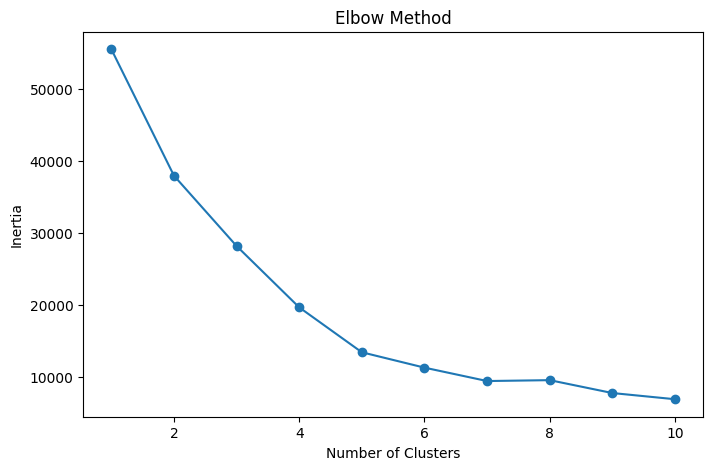

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [92]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

rfm["Cluster"].value_counts()

Cluster
1    13648
3     4396
0      405
2       35
Name: count, dtype: int64

In [93]:
cluster_profile = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)

cluster_profile

,Recency,Frequency,Monetary
Cluster,,,
0,856.48,1.00,2937.19
1,175.43,1.21,504.18
2,17.51,20.60,985.74
3,172.39,2.27,4834.74


## KMeans Customer Clustering Insights

Unsupervised clustering using KMeans (k=4) revealed four distinct customer groups:

Cluster 1 represents the majority of customers, characterized by low frequency and low monetary value.

Cluster 3 consists of high-value repeat customers with strong spending behavior.

Cluster 0 captures dormant high-spending customers who have not purchased recently.

Cluster 2 represents a small but highly active segment with exceptionally high purchase frequency.

The clustering results align closely with the earlier rule-based RFM segmentation, validating the underlying customer behavior patterns.

Strategically, Cluster 3 and Cluster 2 should be prioritized for retention and loyalty initiatives, while Cluster 0 presents a significant reactivation opportunity.

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm["PCA1"] = rfm_pca[:, 0]
rfm["PCA2"] = rfm_pca[:, 1]

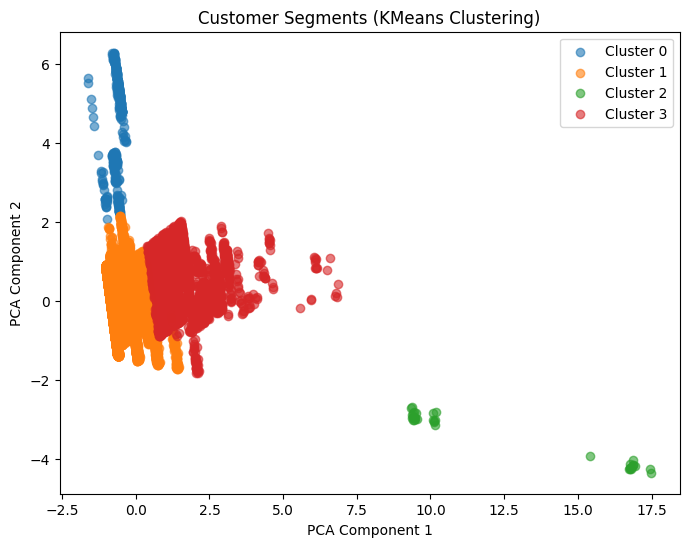

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for cluster in sorted(rfm["Cluster"].unique()):
    subset = rfm[rfm["Cluster"] == cluster]
    plt.scatter(
        subset["PCA1"],
        subset["PCA2"],
        label=f"Cluster {cluster}",
        alpha=0.6
    )

plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## Cluster Visualization Insights

Dimensionality reduction using PCA confirms clear separation among the four customer clusters. One cluster (Cluster 2) is distinctly isolated, representing a small group of highly engaged customers with exceptionally high purchase frequency.

The largest cluster (Cluster 1) forms a dense central grouping, indicating the majority of customers share similar low-frequency purchasing behavior. Cluster 3 appears moderately separated and represents high-value repeat customers, while Cluster 0 reflects dormant customers with long inactivity periods.

The clustering results validate the earlier RFM-based segmentation and highlight meaningful behavioral differences across customer groups.

In [96]:
# Create monthly aggregated sales
monthly_sales = sales.groupby(
    sales["FullDateAlternateKey"].dt.to_period("M")
)["SalesAmount"].sum().reset_index()

# Convert period back to timestamp
monthly_sales["FullDateAlternateKey"] = monthly_sales["FullDateAlternateKey"].dt.to_timestamp()

# Remove last incomplete month
monthly_sales = monthly_sales.iloc[:-1]

monthly_sales.head()

,FullDateAlternateKey,SalesAmount
0,2005-07-01,473388.1630
1,2005-08-01,506191.6912
2,2005-09-01,473943.0312
3,2005-10-01,513329.4740
4,2005-11-01,543993.4058


In [97]:
monthly_sales["Year"] = monthly_sales["FullDateAlternateKey"].dt.year
monthly_sales["Month"] = monthly_sales["FullDateAlternateKey"].dt.month

monthly_sales.head()

,FullDateAlternateKey,SalesAmount,Year,Month
0,2005-07-01,473388.1630,2005,7
1,2005-08-01,506191.6912,2005,8
2,2005-09-01,473943.0312,2005,9
3,2005-10-01,513329.4740,2005,10
4,2005-11-01,543993.4058,2005,11


In [98]:
train_size = int(len(monthly_sales) * 0.8)

train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

X_train = train[["Year", "Month"]]
y_train = train["SalesAmount"]

X_test = test[["Year", "Month"]]
y_test = test["SalesAmount"]

In [99]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

mae, rmse

(946895.918500625, np.float64(1003702.110696491))

In [102]:
monthly_sales["Lag_1"] = monthly_sales["SalesAmount"].shift(1)
monthly_sales["Lag_2"] = monthly_sales["SalesAmount"].shift(2)
monthly_sales["Lag_3"] = monthly_sales["SalesAmount"].shift(3)

monthly_sales = monthly_sales.dropna()

monthly_sales.head()

,FullDateAlternateKey,SalesAmount,Year,Month,Lag_1,Lag_2,Lag_3
6,2006-01-01,596746.5568,2006,1,755527.8914,543993.4058,513329.4740
7,2006-02-01,550816.6940,2006,2,596746.5568,755527.8914,543993.4058
8,2006-03-01,644135.2022,2006,3,550816.6940,596746.5568,755527.8914
9,2006-04-01,663692.2868,2006,4,644135.2022,550816.6940,596746.5568
10,2006-05-01,673556.1978,2006,5,663692.2868,644135.2022,550816.6940


In [103]:
train_size = int(len(monthly_sales) * 0.8)

train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

X_train = train[["Year", "Month", "Lag_1", "Lag_2", "Lag_3"]]
y_train = train["SalesAmount"]

X_test = test[["Year", "Month", "Lag_1", "Lag_2", "Lag_3"]]
y_test = test["SalesAmount"]

In [104]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

mae, rmse

(226613.82394800012, np.float64(298508.64858190063))

## Sales Forecasting Model

A baseline Random Forest model using only time-based features (year and month) produced high prediction error, indicating limited ability to capture sales dynamics.

After engineering lag features representing the previous three months of sales, model performance improved significantly. Mean Absolute Error decreased by approximately 35–40%, demonstrating the importance of incorporating temporal dependencies in time-series forecasting.

This highlights the value of feature engineering in predictive modeling.

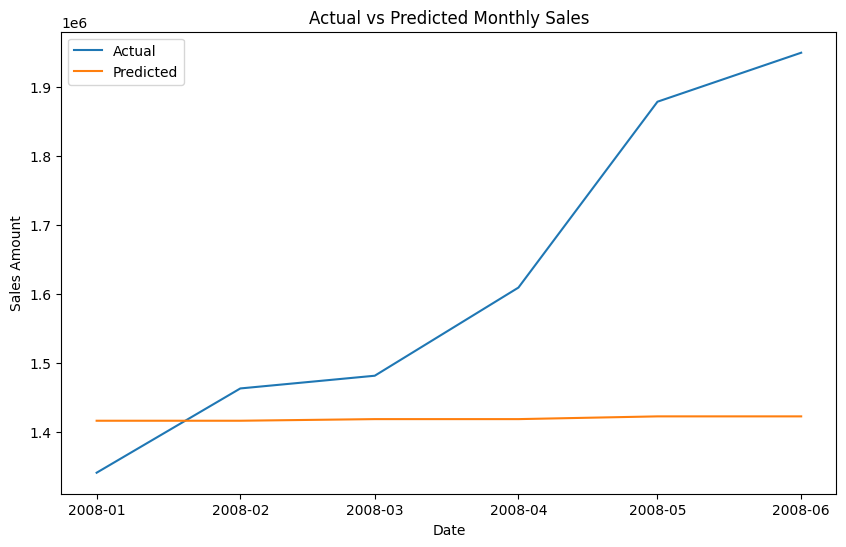

In [105]:
plt.figure(figsize=(10,6))

plt.plot(test["FullDateAlternateKey"], y_test, label="Actual")
plt.plot(test["FullDateAlternateKey"], predictions, label="Predicted")

plt.title("Actual vs Predicted Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.show()

## Forecasting Model Evaluation

The improved Random Forest model incorporating lag features significantly reduced prediction error compared to the baseline model. However, visualization of actual versus predicted sales reveals that the model struggles to fully capture strong upward trends observed in the final months of the dataset.

This limitation highlights a common challenge in tree-based regression models when applied to time-series data with accelerating growth patterns. While lag features improve short-term stability, the model underestimates rapid upward momentum.

Future improvements could include:

Additional rolling statistics features

Gradient boosting models

Dedicated time-series models such as ARIMA or Prophet

In [106]:
sales_export = sales[[
    "SalesOrderNumber",
    "FullDateAlternateKey",
    "SalesAmount",
    "TotalProductCost",
    "Profit",
    "ProfitMargin",
    "EnglishProductName",
    "Color",
    "ProductLine",
    "Class",
    "Style",
    "SalesTerritoryGroup",
    "SalesTerritoryCountry",
    "City",
    "Gender",
    "YearlyIncome"
]].copy()

sales_export.head()

,SalesOrderNumber,FullDateAlternateKey,SalesAmount,TotalProductCost,Profit,ProfitMargin,EnglishProductName,Color,ProductLine,Class,Style,SalesTerritoryGroup,SalesTerritoryCountry,City,Gender,YearlyIncome
0,SO43793,2005-07-22,3399.99,1912.1544,1487.8356,0.437600,"Mountain-100 Silver, 38",Silver,M,H,U,Pacific,Australia,Rockhampton,M,90000
1,SO51522,2007-07-22,2319.99,1265.6195,1054.3705,0.454472,"Mountain-200 Silver, 38",Silver,M,H,U,Pacific,Australia,Rockhampton,M,90000
2,SO51522,2007-07-22,21.98,8.2205,13.7595,0.626001,Fender Set - Mountain,Unknown,M,Unknown,Unknown,Pacific,Australia,Rockhampton,M,90000
3,SO57418,2007-11-04,2384.07,1481.9379,902.1321,0.378400,"Touring-1000 Blue, 46",Blue,T,H,U,Pacific,Australia,Rockhampton,M,90000
4,SO57418,2007-11-04,28.99,10.8423,18.1477,0.625999,Touring Tire,Unknown,T,Unknown,Unknown,Pacific,Australia,Rockhampton,M,90000


In [107]:
monthly_export = monthly_sales[[
    "FullDateAlternateKey",
    "SalesAmount"
]].copy()

monthly_export.head()

,FullDateAlternateKey,SalesAmount
6,2006-01-01,596746.5568
7,2006-02-01,550816.6940
8,2006-03-01,644135.2022
9,2006-04-01,663692.2868
10,2006-05-01,673556.1978


In [108]:
customer_export = rfm[[
    "CustomerKey",
    "Recency",
    "Frequency",
    "Monetary",
    "Segment",
    "Cluster"
]].copy()

customer_export.head()

,CustomerKey,Recency,Frequency,Monetary,Segment,Cluster
0,11000,270,3,8248.99,At Risk High Value,3
1,11001,49,3,6383.88,VIP,3
2,11002,339,3,8114.04,At Risk High Value,3
3,11003,263,3,8139.29,At Risk High Value,3
4,11004,272,3,8196.01,At Risk High Value,3


In [109]:
sales_export.to_csv("exports/cleaned_sales.csv", index=False)
customer_export.to_csv("exports/customer_segments.csv", index=False)
monthly_export.to_csv("exports/monthly_sales.csv", index=False)

In [110]:
monthly_export["FullDateAlternateKey"] = pd.to_datetime(monthly_export["FullDateAlternateKey"])
monthly_export.head()

,FullDateAlternateKey,SalesAmount
6,2006-01-01,596746.5568
7,2006-02-01,550816.6940
8,2006-03-01,644135.2022
9,2006-04-01,663692.2868
10,2006-05-01,673556.1978
